In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/pca_analysis.csv")

In [ ]:
y = df['num']

X = df.drop('num', axis=1)

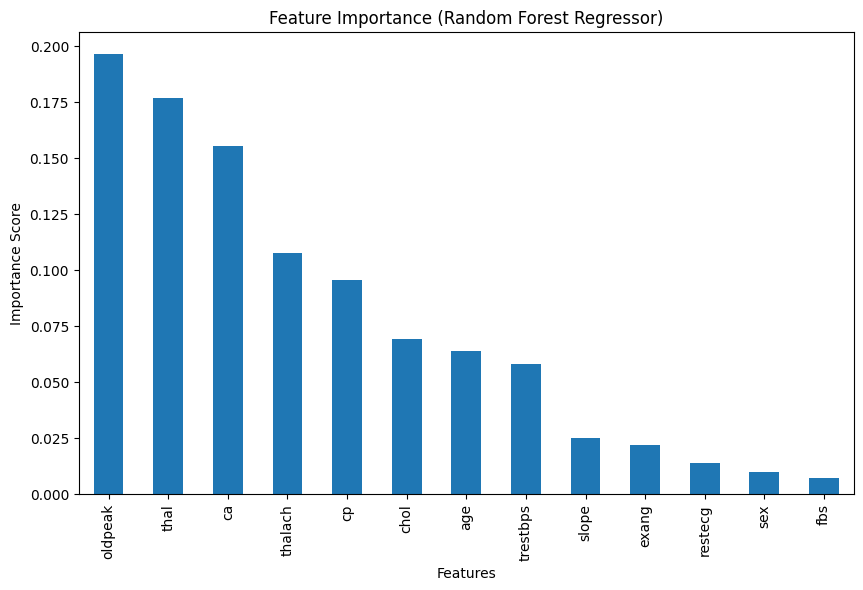

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(15).plot(kind='bar')
plt.title('Feature Importance (Random Forest Regressor)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


In [ ]:
print(df.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [ ]:
selected_features = ['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target_col = 'num'

selected_features_final = selected_features + [target_col]
df = df[selected_features_final]

df.to_csv('reduced_dataset.csv', index=False)
print("Reduced dataset saved successfully")

Reduced dataset saved successfully
